<a href="https://colab.research.google.com/github/moabdelmoez/deeplearning-projects/blob/master/cifar_10_image_classification_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10

#1- load the CIFAR-10 Data

#load the pre-shuffled train and test dataset from load_data()
(feature_train, label_train), (feature_test, label_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 50s 0us/step


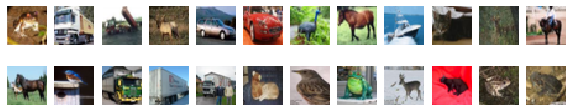

In [2]:
#2- Visualizing the first 24 training images

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,2))
for i in range(24):
  ax = fig.add_subplot(2, 12, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(feature_train[i]))

In [0]:
#3- Rescale the images by dividing every pixel in every image by 255

feature_train = feature_train.astype('float32')/255
feature_test = feature_test.astype('float32')/255

In [4]:
#4- Split the data into training, testing and validating sets

from keras.utils import np_utils

#one-hot encoding
num_classes = len(np.unique(label_train))
label_train = keras.utils.to_categorical(label_train, num_classes)
label_test = keras.utils.to_categorical(label_test, num_classes)

#splitting the data into training and validation datasets
(feature_train, feature_valid) = feature_train[5000:], feature_train[:5000]
(label_train, label_valid) = label_train[5000:], label_train[:5000]

#print shape of training set
print('feature_train shape: ', feature_train.shape)

#print number of training, testing and validation images
print(feature_train.shape[0], 'train samples')
print(feature_test.shape[0], 'test samples')
print(feature_valid.shape[0], 'validation samples')

feature_train shape:  (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [5]:
#5- Define the CNN model architecture

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

In [0]:
#6- Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
#7- Train the model

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(feature_train, label_train, batch_size=32, epochs=10, validation_data=(feature_valid, label_valid),
                callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 53s - loss: 0.9858 - acc: 0.6484 - val_loss: 0.9141 - val_acc: 0.6814

Epoch 00001: val_loss improved from inf to 0.91405, saving model to model.weights.best.hdf5
Epoch 2/10
 - 53s - loss: 0.9361 - acc: 0.6690 - val_loss: 0.8883 - val_acc: 0.6894

Epoch 00002: val_loss improved from 0.91405 to 0.88827, saving model to model.weights.best.hdf5
Epoch 3/10
 - 52s - loss: 0.8886 - acc: 0.6868 - val_loss: 0.8285 - val_acc: 0.7166

Epoch 00003: val_loss improved from 0.88827 to 0.82850, saving model to model.weights.best.hdf5
Epoch 4/10
 - 53s - loss: 0.8442 - acc: 0.7011 - val_loss: 0.8176 - val_acc: 0.7186

Epoch 00004: val_loss improved from 0.82850 to 0.81762, saving model to model.weights.best.hdf5
Epoch 5/10
 - 52s - loss: 0.8140 - acc: 0.7118 - val_loss: 0.7830 - val_acc: 0.7284

Epoch 00005: val_loss improved from 0.81762 to 0.78304, saving model to model.weights.best.hdf5
Epoch 6/10
 - 52s - loss: 0.7797 - acc: 0.7229 - v

In [0]:
#8- Load the weights

model.load_weights('model.weights.best.hdf5')

In [14]:
#9- Calculate the classification accuracy in test set

score = model.evaluate(feature_test, label_test, verbose=0)
print('Test Accuracy is ',score[1])

Test Accuracy is  0.7355
